In [318]:
import numpy as np
from scipy.special import comb
from scipy import stats
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [18]:
def P(t, w, p):
    return comb(t, w) * p**w * (1 - p) ** (t - w)


def R(t, w, G, L):
    return (1 + G) ** w * (1 + L) ** (t - w)


def E_R(t, G, L, p):
    sum = 0
    for w in range(t + 1):
        sum += P(t, w, p) * R(t, w, G, L)
    return sum

In [26]:
def E_R_s(t, G, L, p):
    return ((1 + G) ** p * (1 + L) ** (1 - p)) ** t

In [163]:
def sim_path(T, G, L, p):
    game_hist = rng.choice([1.0, 0.0], T, p=[p, 1 - p])
    game_hist[game_hist == 1] = 1 + G
    game_hist[game_hist == 0] = 1 + L
    return np.cumprod(game_hist)

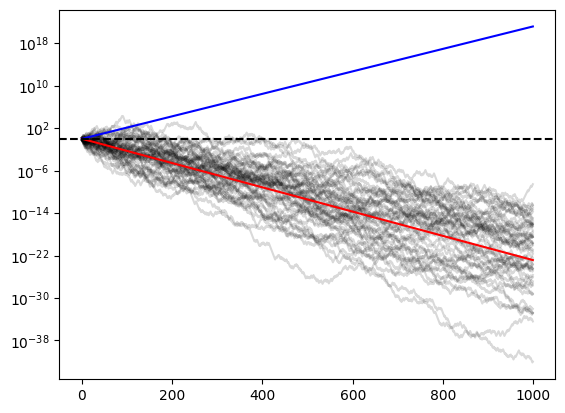

In [313]:
G = 0.5
L = -0.4
p = 0.5

plt.plot(
    np.array([sim_path(1000, G, L, p) for x in range(50)]).T, color="black", alpha=0.15
)
plt.plot([E_R_s(t, G, L, p) for t in range(1000)], color="red")
plt.plot([E_R(t, G, L, p) for t in range(1000)], color="blue")
plt.axhline(1, color="black", linestyle="dashed")
plt.yscale("log")

In [ ]:
# TODO: Analyze the relative contribution of each possible path to the ensemble average.
# Hypothesis: The path with a win at every round will accumulate so much wealth that it will still hugely contribute to the overall average
# even if it's probability is extremely low
# TODO: Next question: decay rates of the probabilities of extreme paths versus the accumulation rate of their wealth
# TODO: Compare average of all paths that are above break even to all paths below break even

In [339]:
def W_BE(t, G, L):
    return -t * np.log(1 + L) / (np.log(1 + G) - np.log(1 + L))

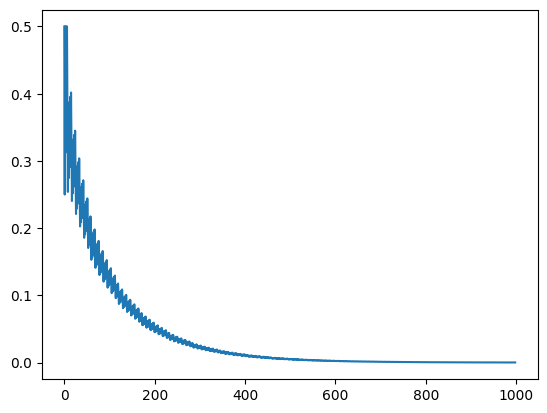

In [362]:
plt.plot([1 - stats.binom.cdf(k=W_BE(n, G, L), n=n, p=p) for n in range(1, 1000)])

In [375]:
def wealths(t, G, L):
    w_be = W_BE(t, G, L)
    winning_wealth = 0
    losing_wealth = 0
    for w in range(t+1):
        if w < w_be:
            losing_wealth += R(t, w, G, L)
        else:
            winning_wealth += R(t, w, G, L)
    return winning_wealth, losing_wealth


In [387]:
wealths(10, G, L)

(95.1242484375, 0.9801189215999997)